In [1]:
import sys
sys.path.insert(0, '/home/users/brezovec/.local/lib/python3.6/site-packages/lib/python/')
import ants
import os
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
from scipy.ndimage.filters import gaussian_filter
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 20})

In [3]:
root_directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/'

# Load Meanbrain

In [4]:
file = os.path.join(root_directory,
                    '2019_nov_meanbrain',
                    'meanbrain_final.nii')

meanbrain = bbb.load_numpy_brain(file)

# Reset master spacing

meanbrain = ants.from_numpy(meanbrain)
anatomy_xml = os.path.join(root_directory, 'fly_25', 'anat_0', 'anatomy.xml')
meanbrain.set_spacing(bbb.get_resolution(anatomy_xml))


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 487.21 ms


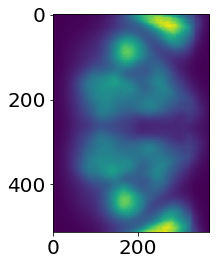

In [7]:
plt.imshow(meanbrain.numpy()[:,:,200])

# Load Template

In [8]:
template_file = os.path.join('/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190224_anatomy_central', 'meanbrain1', 'JFRCtemplate2010.nii')
template = bbb.load_numpy_brain(template_file)


~~ load_numpy_brain ~~
load_numpy_brain done. Duration: 697.22 ms


In [9]:
# Flip Z-axis
template = template[:,:,::-1]

In [10]:
# Cut off optic lobes
template = template[200:800,:,:]

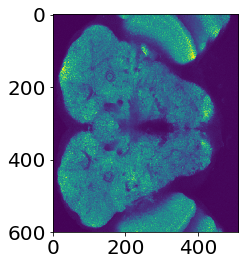

In [11]:
plt.imshow(template[:,:,80])

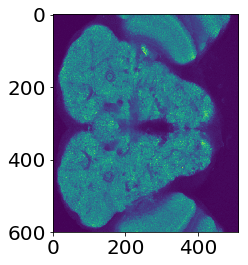

In [20]:
plt.imshow(template_n4.numpy()[:,:,80])

In [12]:
# Set resolution
template = ants.from_numpy(template)
ants.set_spacing(template, (0.622, 0.622, 0.622))

In [13]:
meanbrain_n4 = ants.n4_bias_field_correction(meanbrain)
template_n4 = ants.n4_bias_field_correction(template)

In [17]:
master = meanbrain_n4
slave = template_n4

print('Started...')
t0 = time.time()
slave2master = ants.registration(master,
                                 slave,
                                 type_of_transform='ElasticSyN')
print('COMPLETE. Duration: {:0.0f} sec'.format(time.time()-t0))

Started...
COMPLETE. Duration: 209 sec


In [18]:
save_folder = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/2019_nov_meanbrain/template alignment/'

In [19]:
file = os.path.join(save_folder, 'template2mean_n4_ElasticSyN.nii')
bbb.save_brain(file, slave2master['warpedmovout'].numpy())


~~ save_brain ~~
Current memory usage: 5.01GB
save_brain done. Duration: 574.63 ms
